In [2]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import xarray as xrs
from scipy import ndimage

In [5]:

import utils
data=utils.load_data_set()
data

lon   x   y        lat       B01       B02       B03  \
n                                                                             
2018-06-07 0     26.564011   0   0  39.109287       NaN       NaN       NaN   
           1     26.564127   1   0  39.109287       NaN       NaN       NaN   
           2     26.564241   2   0  39.109287       NaN       NaN       NaN   
           3     26.564358   3   0  39.109291       NaN       NaN       NaN   
           4     26.564474   4   0  39.109291       NaN       NaN       NaN   
...                    ...  ..  ..        ...       ...       ...       ...   
2019-06-07 1003  26.568302  37  23  39.107231  0.036926  0.035275  0.030083   
           1004  26.568419  38  23  39.107231  0.037197  0.037299  0.032572   
           1005  26.568535  39  23  39.107231  0.037197  0.037173  0.031452   
           1006  26.568649  40  23  39.107231  0.037197  0.036793  0.030208   
           1007  26.568766  41  23  39.107235  0.037197  0.036667  0.029959   

                      B04       B05       B06       B07       B08      B08A  \
n                                                                             
2018-06-07 0          NaN       NaN       NaN       NaN       NaN       NaN   
           1          NaN       NaN       NaN       NaN       NaN       NaN   
           2          NaN       NaN       NaN       NaN       NaN       NaN   
           3          NaN       NaN       NaN       NaN       NaN       NaN   
           4          NaN       NaN       NaN       NaN       NaN       NaN   
...                   ...       ...       ...       ...       ...       ...   
2019-06-07 1003  0.022997  0.022115  0.024495  0.025049  0.021762  0.024173   
           1004  0.023799  0.021659  0.024382  0.024723  0.024465  0.022685   
           1005  0.022882  0.021659  0.024382  0.024723  0.023451  0.022685   
           1006  0.022080  0.020402  0.022686  0.023311  0.022437  0.022792   
           1007  0.022080  0.020402  0.022686  0.023311  0.022437  0.022792   

                      B11       B12  label   distance  
n                                                      
2018-06-07 0          NaN       NaN    0.0   0.000000  
           1          NaN       NaN    0.0   0.000000  
           2          NaN       NaN    0.0   0.000000  
           3          NaN       NaN    0.0   0.000000  
           4          NaN       NaN    0.0   0.000000  
...                   ...       ...    ...        ...  
2019-06-07 1003  0.019884  0.017037    0.0  28.425341  
           1004  0.019473  0.016931    0.0  29.206164  
           1005  0.019473  0.016931    0.0  30.000000  
           1006  0.019473  0.016399    0.0  30.805844  
           1007  0.019473  0.016399    0.0  31.622777  

[6048 rows x 17 columns]

grande variabilité de l'image

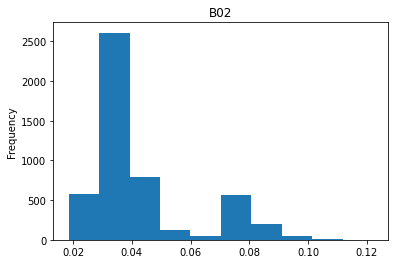

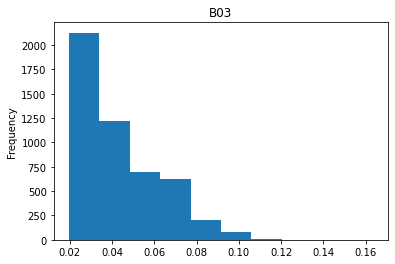

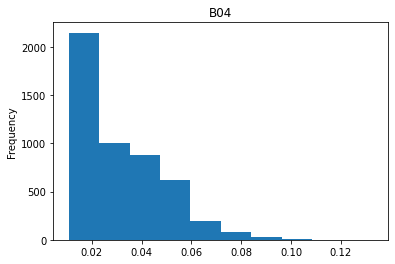

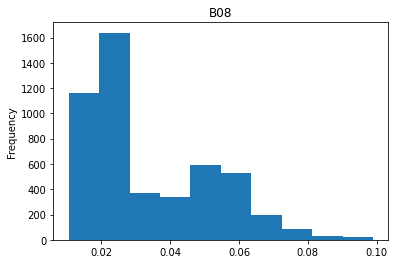

In [7]:

for i in ['B02', 'B03', 'B04','B08']:
    plt.figure()
    plt.title(i)
    data[i].plot.hist()

plot histogramme par image

In [8]:
data.index.unique(level=0)

Index(['2018-06-07', '2019-05-03', '2019-04-18', '2019-05-18', '2019-05-28',
       '2019-06-07'],
      dtype='object', name='n')

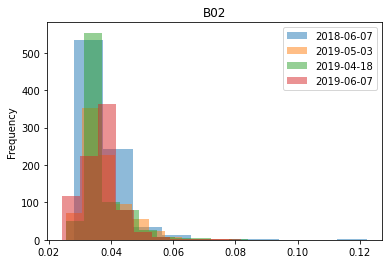

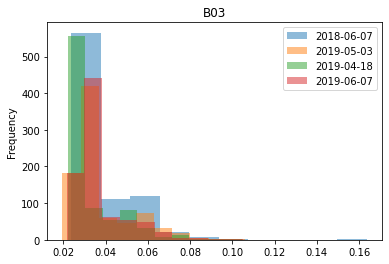

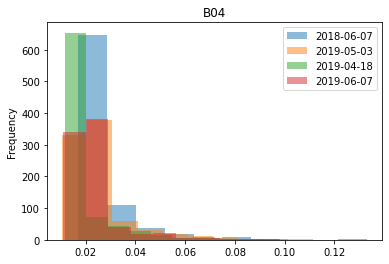

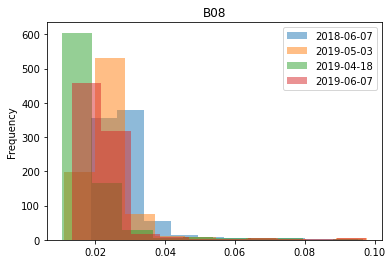

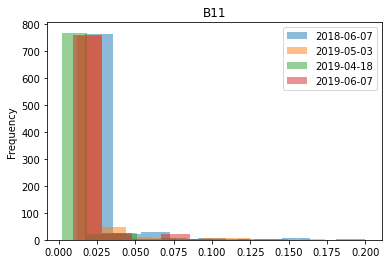

In [24]:
date= ['2018-06-07', '2019-05-03', '2019-04-18','2019-06-07']
    
for k in ['B02', 'B03', 'B04','B08','B11']:
    plt.figure()
    plt.title(str(k))
    for i in date:
       
        current_image=data.loc[i]

        current_image[k].plot.hist(alpha=0.5)
    plt.legend(date)

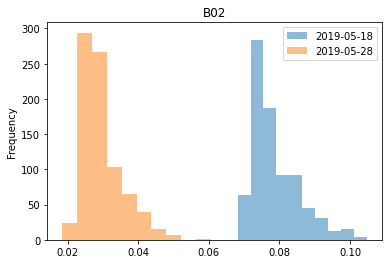

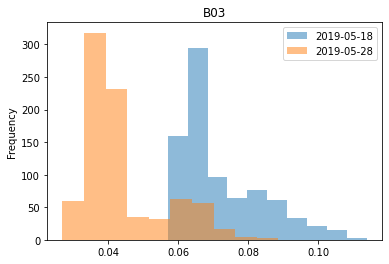

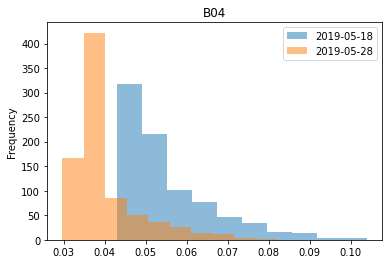

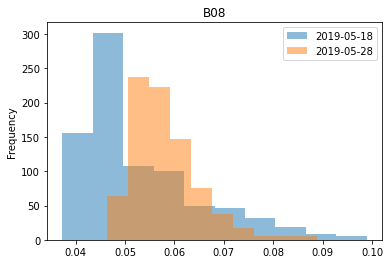

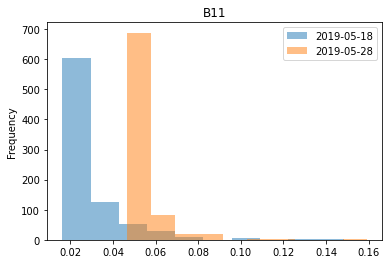

In [9]:
date=['2019-05-18','2019-05-28']
for k in ['B02', 'B03', 'B04','B08','B11']:
    plt.figure()
    plt.title(str(k))
    for i in date:
       
        current_image=data.loc[i]

        current_image[k].plot.hist(alpha=0.5)
    plt.legend(date)

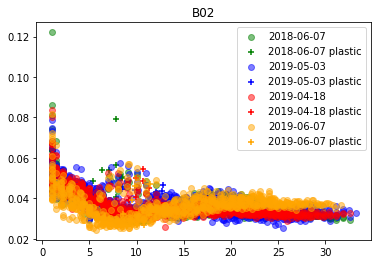

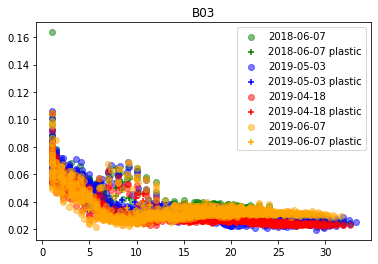

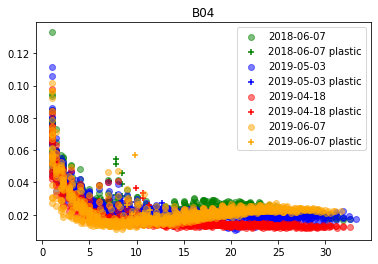

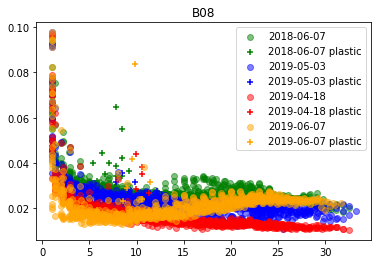

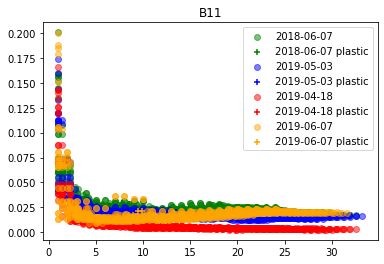

In [13]:
%matplotlib inline
couleurs=["green","blue","red","orange","yellow"]
legend=['2018-06-07','2018-06-07 plastic', '2019-05-03', '2019-05-03 plastic','2019-04-18', '2019-04-18 plastic','2019-06-07', '2019-06-07 plastic']
date= ['2018-06-07', '2019-05-03', '2019-04-18','2019-06-07']
    
for k in ['B02', 'B03', 'B04','B08','B11']:
    plt.figure()
    plt.title(str(k))
    for indice,i in enumerate(date):
       
        current_image=data.loc[i]
        x=current_image["distance"]
        y=current_image[k]
        plt.scatter(x[current_image.label==0],y[current_image.label==0],c=couleurs[indice],alpha=0.5)
        plt.scatter(x[current_image.label==1],y[current_image.label==1],c=couleurs[indice],alpha=1,marker='+')
    plt.legend(legend)
    
    plt.savefig(str(k))

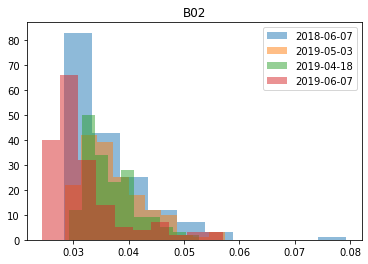

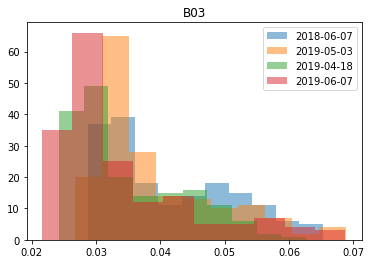

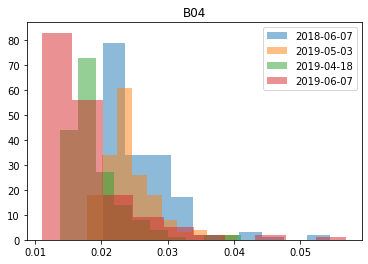

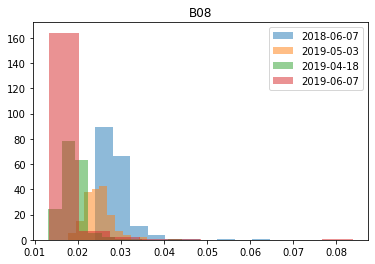

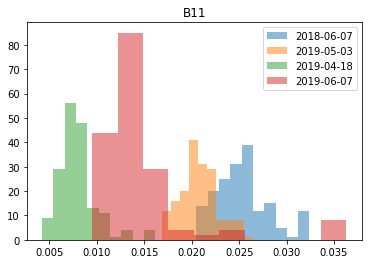

In [11]:
%matplotlib inline
couleurs=["green","blue","red","orange","yellow"]
date= ['2018-06-07', '2019-05-03', '2019-04-18','2019-06-07']
    
for k in ['B02', 'B03', 'B04','B08','B11']:
    plt.figure()
    plt.title(str(k))
    for indice,i in enumerate(date):
       
        current_image=data.loc[i]
        current_image=current_image[current_image.distance.between(5,10)]
        #x=current_image["distance"]
        #y=current_image[k]
        plt.hist(current_image[k],alpha=0.5)
        #plt.scatter(x,y,c=couleurs[indice],alpha=0.5)
    
    plt.legend(date)
    
    plt.savefig(str(k))